In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('injury_report_combined_years_v4.csv')
df.head()

,Name,Team,Pos,Injury / Surgery Date,Injury / Surgery,Status,IL Retro Date,Eligible to Return,Return Date,Latest Update,year
0,Chris Martin,BOS,RP,Jun '24,Anxiety,Activated,06/02/24,06/17/24,06/18/24,Activated,2024
1,Walker Buehler,LAD,SP,08/23/22,Tommy John surgery,Activated,03/17/24,04/07/24,05/06/24,Activated,2024
2,Shane Baz,TBR,SP,09/28/22,Tommy John surgery,Activated,03/25/24,04/09/24,05/23/24,Activated,2024
3,Lucas Gilbreath,COL,RP,03/14/23,Tommy John surgery,Activated,03/25/24,05/24/24,08/16/24,Activated,2024
4,Cade Cavalli,WSN,SP,03/22/23,Tommy John surgery,60-Day IL,03/28/24,05/27/24,NaN,No timetable for return,2024


In [3]:
injury_counts = df['Injury / Surgery'].value_counts().reset_index()
injury_counts.columns = ['Injury / Surgery', 'Frequency']
injury_counts

,Injury / Surgery,Frequency
0,Strained hamstring,307
1,Tommy John surgery,234
2,Strained oblique,219
3,Undisclosed,160
4,Shoulder inflammation,146
...,...,...
675,Cracked fingernail/blister,1
676,Cervical nerve impingement,1
677,Knee surgery (torn tendon),1
678,Thoracic outlet syndrome surgery (follow-up pr...,1


### Injury Frequency Bar Chart: Show the most common types of injuries among players.

In [4]:
top_injury_counts = df['Injury / Surgery'].value_counts().head(10).reset_index()
top_injury_counts.columns = ['Injury / Surgery', 'Frequency']
top_injury_counts

,Injury / Surgery,Frequency
0,Strained hamstring,307
1,Tommy John surgery,234
2,Strained oblique,219
3,Undisclosed,160
4,Shoulder inflammation,146
5,COVID-19,140
6,Strained groin,122
7,Strained shoulder,118
8,Elbow inflammation,110
9,COVID-19 (protocol),98


C:\Users\Abbi\AppData\Local\Temp\ipykernel_2848\1650876543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Injury / Surgery', data=top_injury_counts, palette='viridis')


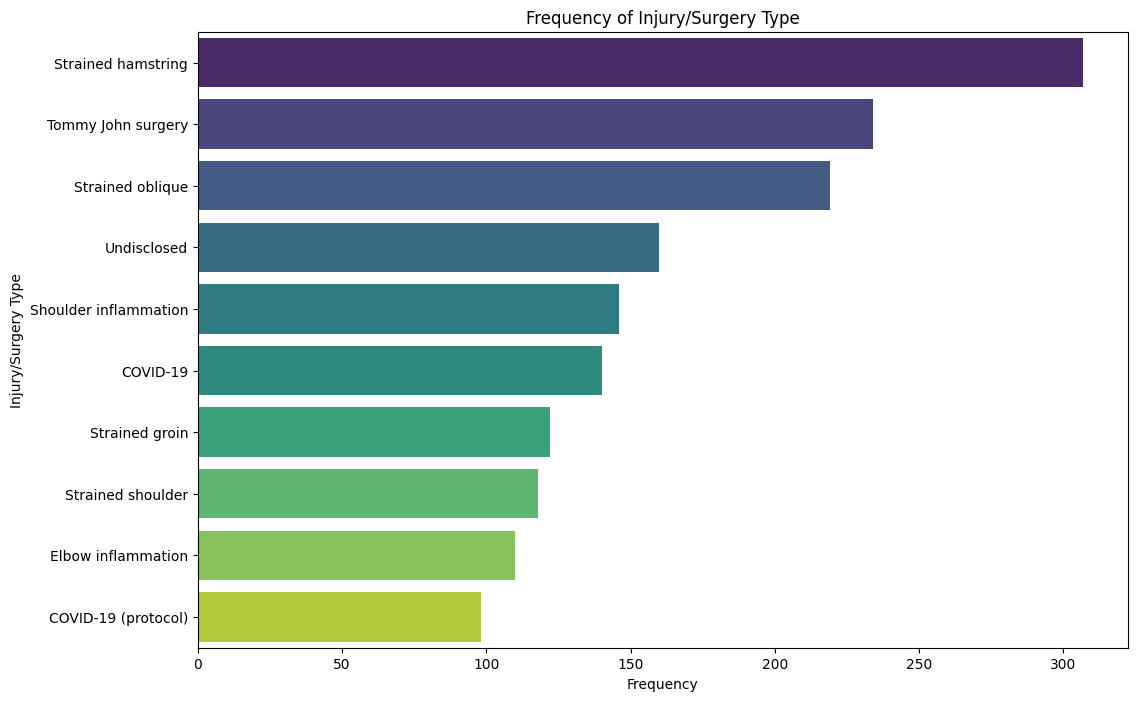

In [5]:
plt.figure(figsize=(12,8))
sns.barplot(x='Frequency', y='Injury / Surgery', data=top_injury_counts, palette='viridis')
plt.title('Frequency of Injury/Surgery Type')
plt.xlabel('Frequency')
plt.ylabel('Injury/Surgery Type')
plt.show()

### Heatmap of Injuries by Team and Year: Display which teams have the most injuries each year.

In [6]:
# Group the data by 'Team' and 'year' and count the number of injuries
injury_counts = df.groupby(['Team', 'year']).size().reset_index(name='Injury Count')

In [7]:
# Create a pivot table with teams as rows, years as columns, and injury counts as values
injury_pivot = injury_counts.pivot_table(index='Team', columns='year', values='Injury Count', fill_value=0)

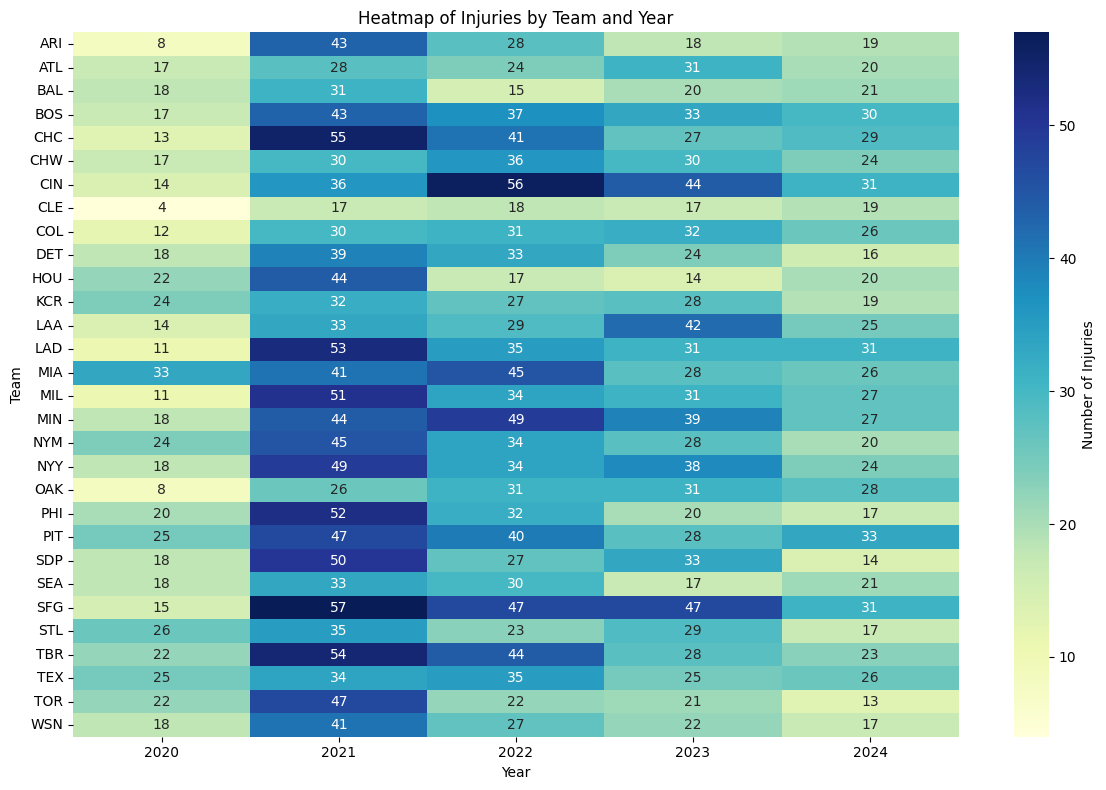

In [8]:
# Generate the heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(injury_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Number of Injuries'})
plt.title('Heatmap of Injuries by Team and Year')
plt.xlabel('Year')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


### Frequency of Injuries Per Month Heatmap: Identify seasonal trends in when injuries occur.

In [9]:
# Convert the 'Injury / Surgery Date' to datetime format to extract the month
df['Injury Date'] = pd.to_datetime(df['Injury / Surgery Date'], errors='coerce')

# Extract the month from the injury date
df['Month'] = df['Injury Date'].dt.month


C:\Users\Abbi\AppData\Local\Temp\ipykernel_2848\1289412762.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Injury Date'] = pd.to_datetime(df['Injury / Surgery Date'], errors='coerce')


In [10]:
# Group the data by 'year' and 'Month' to count the number of injuries
monthly_injury_counts = df.groupby(['year', 'Month']).size().reset_index(name='Injury Count')

# Create a pivot table with years as rows and months as columns
monthly_pivot = monthly_injury_counts.pivot_table(index='year', columns='Month', values='Injury Count', fill_value=0)


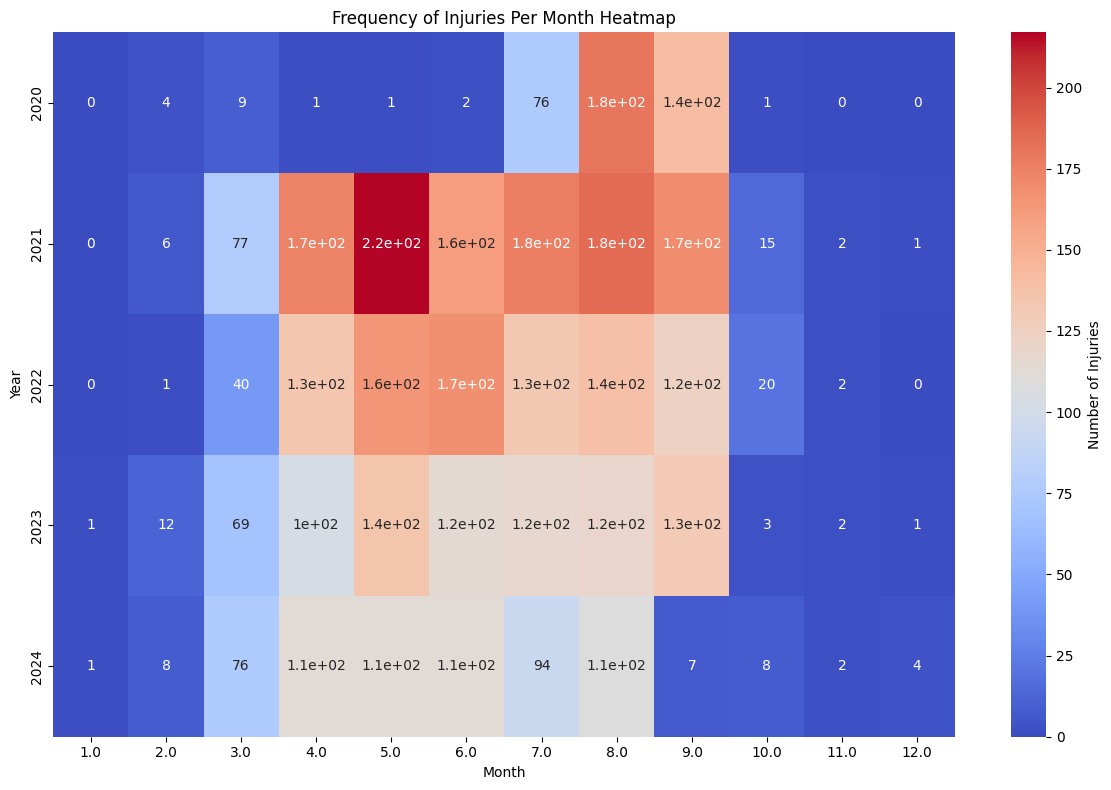

In [11]:
# Plot the heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'Number of Injuries'})
plt.title('Frequency of Injuries Per Month Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


### Timeline of Injuries: A timeline showing injuries over time

In [12]:
# Filter data to include only injury dates from 2020 to 2024
filtered_timeline_data = df[
    (df['Injury Date'] >= '2020-01-01') & 
    (df['Injury Date'] <= '2024-12-31')
]


In [13]:
# Extract the month-year period from the filtered injury dates
filtered_timeline_data['Injury Month-Year'] = filtered_timeline_data['Injury Date'].dt.to_period('M')

# Count the number of injuries per month-year within the filtered date range
filtered_injuries_over_time = filtered_timeline_data.groupby('Injury Month-Year').size().reset_index(name='Injury Count')

# Convert 'Injury Month-Year' back to datetime for plotting
filtered_injuries_over_time['Injury Month-Year'] = filtered_injuries_over_time['Injury Month-Year'].dt.to_timestamp()


C:\Users\Abbi\AppData\Local\Temp\ipykernel_2848\1007970606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_timeline_data['Injury Month-Year'] = filtered_timeline_data['Injury Date'].dt.to_period('M')


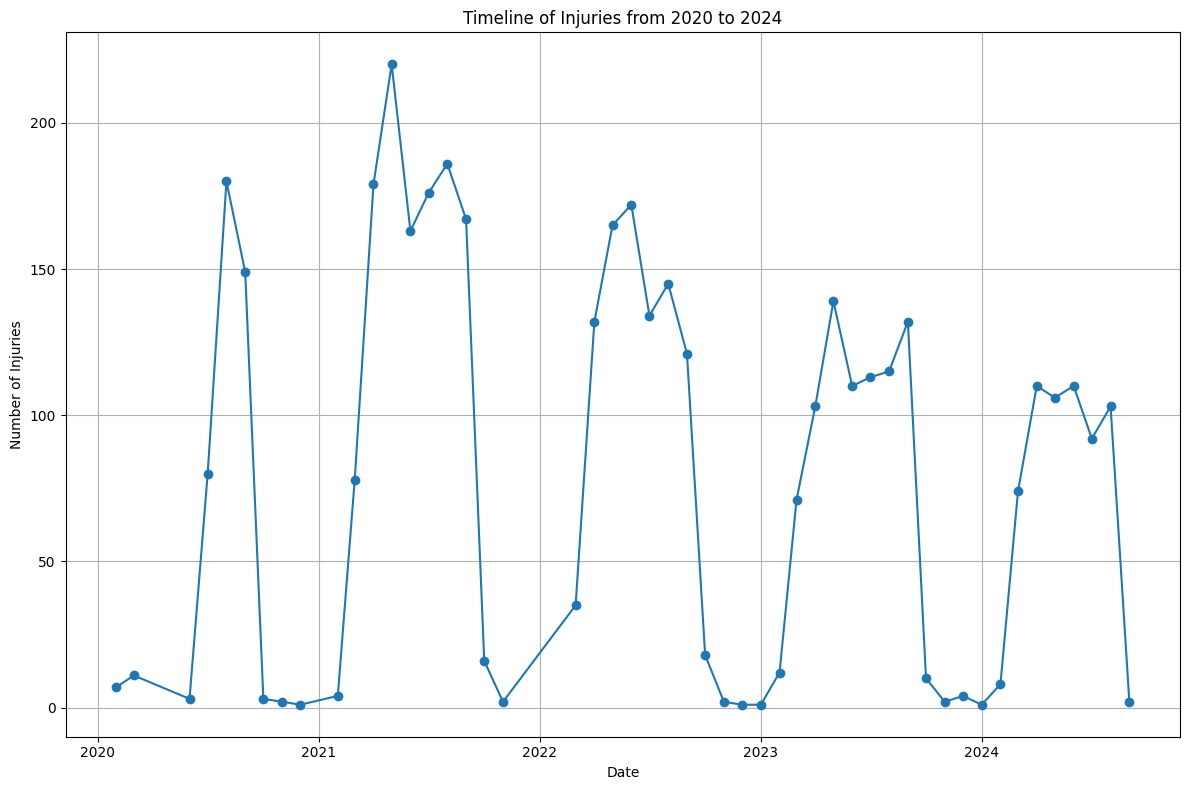

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(filtered_injuries_over_time['Injury Month-Year'], filtered_injuries_over_time['Injury Count'], marker='o', linestyle='-')
plt.title('Timeline of Injuries from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.tight_layout()
plt.show()


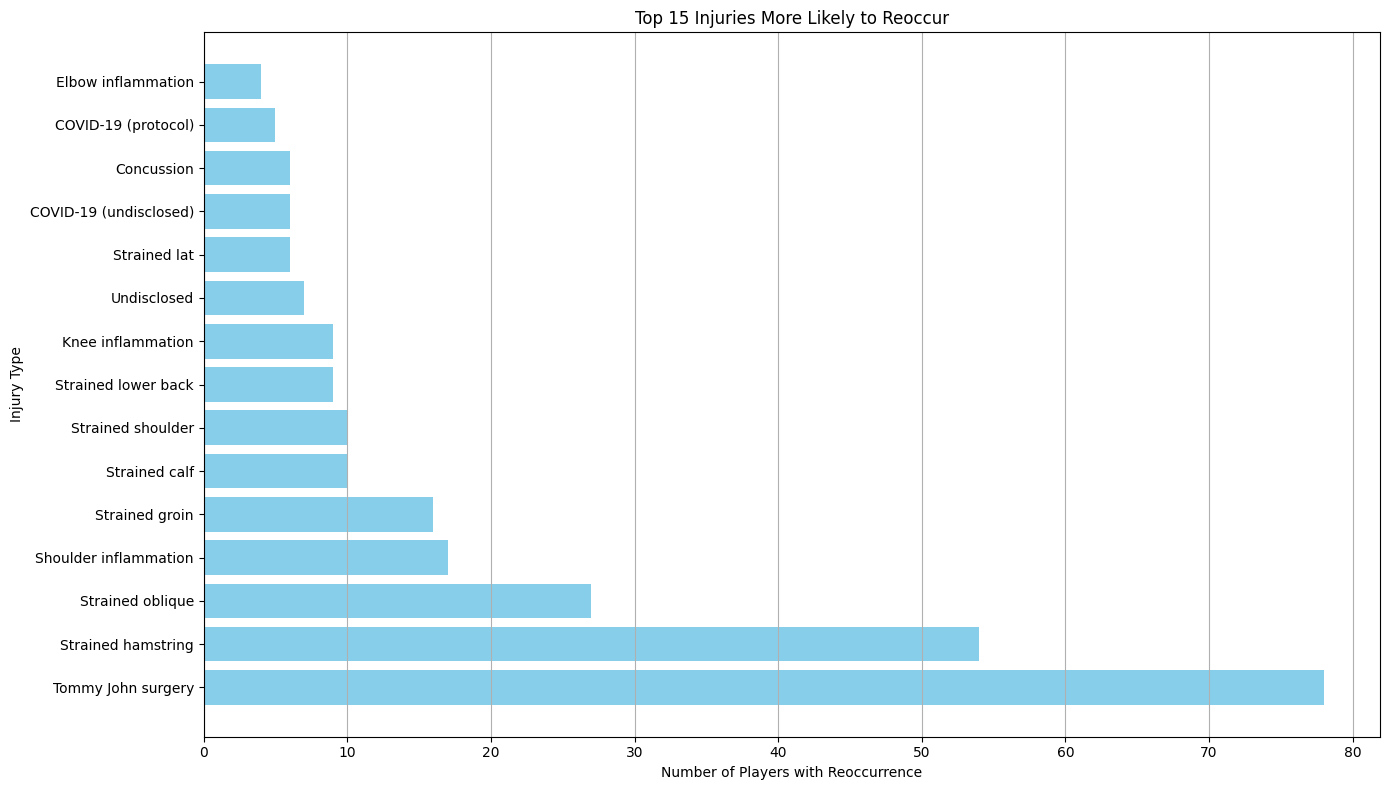

In [27]:
# Step 1: Group by player name and injury type to identify reoccurring injuries per player
reoccurring_injuries = df.groupby(['Name', 'Injury / Surgery']).size().reset_index(name='Count')

# Step 2: Filter for injuries that occur more than once for the same player
reoccurring_injuries = reoccurring_injuries[reoccurring_injuries['Count'] > 1]

# Step 3: Aggregate by injury type to count how many players have had each injury multiple times
injury_reoccurrence_count = reoccurring_injuries.groupby('Injury / Surgery')['Name'].nunique().reset_index(name='Player Count')

# Step 4: Sort and select the top 15 most common reoccurring injuries
top_15_reoccurrences = injury_reoccurrence_count.sort_values(by='Player Count', ascending=False).head(15)

# Step 5: Plot the top 15 injuries more likely to happen again
plt.figure(figsize=(14, 8))
plt.barh(top_15_reoccurrences['Injury / Surgery'], top_15_reoccurrences['Player Count'], color='skyblue')
plt.title('Top 15 Injuries More Likely to Reoccur')
plt.xlabel('Number of Players with Reoccurrence')
plt.ylabel('Injury Type')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()
